Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
NAME = "Hai Dang Hoang"
COLLABORATORS = ""

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [24]:
import timeit
import random

eps = 1e-16 #just a very small number so that python does not count out of range
N = 10000
locations = [0.0, 0.5, 1.0 - eps] #the "tool" to find the location of the three numbers for the median


def median(x1, x2, x3): #find the middle number among three numbers - choosing the "median of 3"
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1 #output the median among the three inputs

def qsort(lst): #the quick sort function. Takes a list as an input
    indices = [(0, len(lst))] #a list of tuples

    while indices: #while indices is not empty
        (frm, to) = indices.pop() #take out the last element in the list, assign them to two variables frm and to
        if frm == to: #if frm is equal to "to", meaning that the list is empty, end the while loop and continue after that
            continue

        # Find the partition:
        N = to - frm #number of elements in the array
        inds = [frm + int(N * n) for n in locations]   #find the index of the three numbers for the median
        values = [lst[ind] for ind in inds] #find the three numbers
        partition = median(*values) #find the median to partition

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #the lower array, split with the newly found median
        upper = [a for a in lst[frm:to] if a > partition] #the upper array
        counts = sum([1 for a in lst[frm:to] if a == partition]) #this is to account for the fact that there may be duplicates of the median

        ind1 = frm + len(lower) #ind1 is the index of the end of the lower array
        ind2 = ind1 + counts #index 2 is the start of the upper array (plus counts to account for duplicates)

        # Push back into correct place:
        lst[frm:ind1] = lower #put back into the original list by substitution
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1)) #then append this back to the indices list (list of tuples above), to loop over
        indices.append((ind2, to))
    return lst #return the sorted list


def randomized_quicksort(): #add randomization to the above quick sort
    lst = [i for i in range(N)] #create a list of all unique values from 0 to N-1
    random.shuffle(lst) #shuffle that list 
    return qsort(lst) #sort that list


def test_quicksort(): #test if the randomized_quicksort worked accurately
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.0999222220016236


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

The main difference is that Cormen et al. uses recursion - it calls itself recursively to divide the partition until there's only one element in each partition, while putting them in place in the list to sort it. The above version uses a while loop, and only stop when the list to sort is empty. Besides the median of 3, another difference is that the above code does not perform swaps - it merely compares and then creates a new list of all elements in the input list that are lower, or larger, than the chosen pivot, then substitute them back in the list. The Cormen et al. version performs swaps to each of the element.

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

The time complexity of randomized_qsort is also $\theta(nlgn)$. This is because while the implementation is different, the above version is similar to Cormen in that we also divide until the arrays only have 1 element -> the number of loops performed will be lg(n). Each of the loops, as seen above, takes $\theta(n)$ time, due to the step of comparing the partition to all the elements in the list (other steps take constant time, so they are ignorable for now). With $lgn$ loops and each loop taking $\theta(n)$ time, the time complexity is $\theta(nlgn)$.

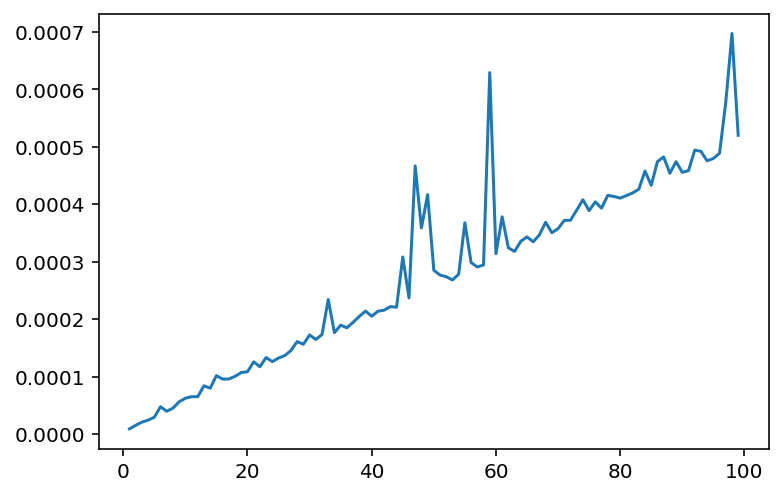

In [34]:
from numpy import mean
list_size=list(range(1,100)) #the size of the lists that we are using to test
time_list=[] #list to store runtimes
for N in list_size:
    local_time=[] #a local list to take the average later
    for j in range(20): #iterate 20 times 
        local_time.append(timeit.timeit(randomized_quicksort, number=1))
    time_list.append(mean(local_time)) #then take the average
import matplotlib.pyplot as plt
plt.plot(list_size, time_list)

## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [35]:
eps = 1e-16 #just a very small number so that python does not count out of range
N = 10000
locations = [0.0, 0.5, 1.0 - eps] #the "tool" to find the location of the three numbers for the median

def qsort(lst): #the quick sort function. Takes a list as an input
    indices = [(0, len(lst))] #a list of tuples

    while indices: #while indices is not empty
        (frm, to) = indices.pop() #take out the last element in the list, assign them to two variables frm and to
        if frm == to: #if frm is equal to "to", meaning that the list is empty, end the while loop and continue after that
            continue

        # Find the partition:
        N = to - frm #number of elements in the array
        inds = [frm + int(N * n) for n in locations]   #find the index of the three numbers for the median
        values = [lst[ind] for ind in inds] #find the three numbers
        partition = median(*values) #find the median to partition

        # Split into lists:
        lst.remove(partition) #removing (one of) the partition out of the original list (I will add it back in the proper position later - this is because the formation of the "lower" list above does not guarantee that the partition will be in the correct position). 
        lower = [a for a in lst[frm:to-1] if a <= partition] #the lower array, split with the newly found median (with one less element now)
        upper = [a for a in lst[frm:to-1] if a > partition] #the upper array

        ind1 = frm + len(lower) #ind1 is the index of the end of the lower array (counts is now removed so no need for ind2)

        # Push back into correct place:
        lst[frm:ind1] = lower #put back into the original list by substitution
        lst.insert(ind1, partition) #we need to insert the pivot into the right position, because in the lower list, it may not be the last element
        lst[ind1+1:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1)) #then append this back to the indices list (list of tuples above), to loop over
        indices.append((ind1+1, to))
    return lst #return the sorted list


In [36]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

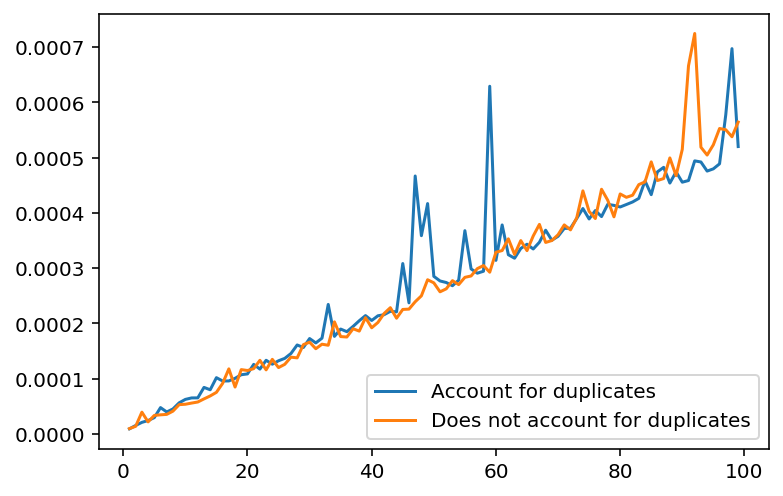

In [37]:
from numpy import mean #When grading, please run all the cells in order - this is because I cannot name the second qsort function something else, due to the assert cell
list_size=list(range(1,100)) #the size of the lists that we are using to test
time_list2=[] #list to store runtimes
for N in list_size:
    local_time=[] #a local list to take the average later
    for j in range(20): #iterate 20 times 
        local_time.append(timeit.timeit(randomized_quicksort, number=1))
    time_list2.append(mean(local_time)) #then take the average
import matplotlib.pyplot as plt
plt.plot(list_size, time_list)
plt.plot(list_size, time_list2)
plt.legend(['Account for duplicates','Does not account for duplicates'])

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [38]:
def qsort(lst): #the quick sort function. Takes a list as an input
    indices = [(0, len(lst))] #a list of tuples

    while indices: #while indices is not empty
        (frm, to) = indices.pop() #take out the last element in the list, assign them to two variables frm and to
        if frm == to: #if frm is equal to "to", meaning that the list is empty, end the while loop and continue after that
            continue

        # Find the partition:
        N = to - frm #number of elements in the array
        partition = lst[frm] #partition is now just the end element

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #the lower array, split with the newly found median
        upper = [a for a in lst[frm:to] if a > partition] #the upper array
        counts = sum([1 for a in lst[frm:to] if a == partition]) #this is to account for the fact that there may be duplicates of the median

        ind1 = frm + len(lower) #ind1 is the index of the end of the lower array
        ind2 = ind1 + counts #index 2 is the start of the upper array (plus counts to account for duplicates)

        # Push back into correct place:
        lst[frm:ind1] = lower #put back into the original list by substitution
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1)) #then append this back to the indices list (list of tuples above), to loop over
        indices.append((ind2, to))
    return lst #return the sorted list



In [39]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



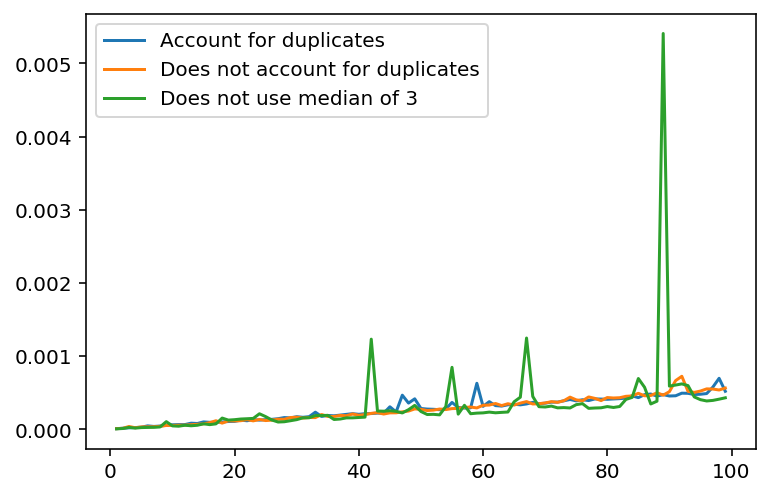

In [43]:
from numpy import mean #When grading, please run all the cells in order - this is because I cannot name the second qsort function something else, due to the assert cell
list_size=list(range(1,100)) #the size of the lists that we are using to test
time_list3=[] #list to store runtimes
for N in list_size:
    local_time=[] #a local list to take the average later
    for j in range(20): #iterate 20 times 
        local_time.append(timeit.timeit(randomized_quicksort, number=1))
    time_list3.append(mean(local_time)) #then take the average
import matplotlib.pyplot as plt
plt.plot(list_size, time_list)
plt.plot(list_size, time_list2)
plt.plot(list_size, time_list3)
plt.legend(['Account for duplicates','Does not account for duplicates','Does not use median of 3'])

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


We now that the number of calls we will make is $lgn$. Since the maximum is 500 recursive calls, we have the maximum size n is given by $lgn = 500$, which results in n=2^500.